In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [35]:
data_btc = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])

In [36]:
data_btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


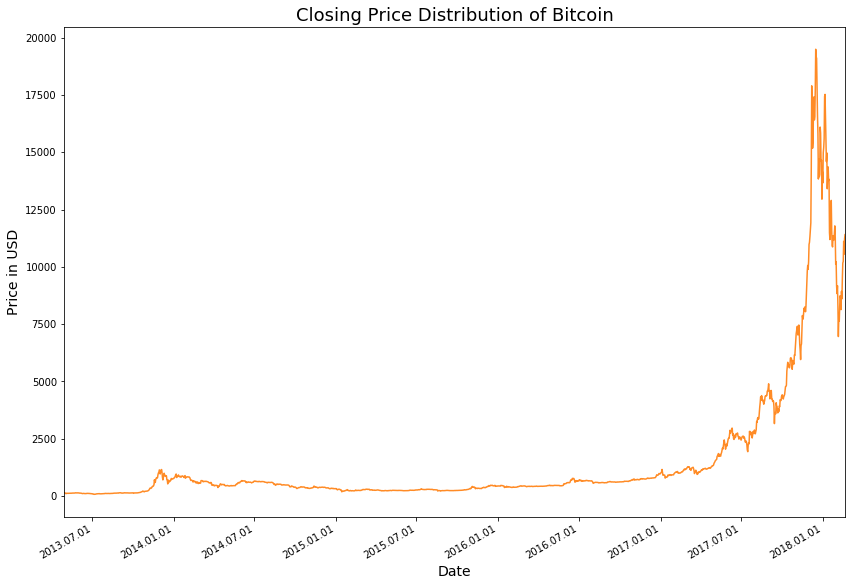

In [37]:
import matplotlib.dates as mdates
data_btc['Date_mpl'] = data_btc['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(14,10))
sns.tsplot(data_btc.Close.values, time=data_btc.Date_mpl.values, alpha=0.9, color=color[1], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title("Closing Price Distribution of Bitcoin", fontsize=18)
plt.show()

In [38]:
data_bch = pd.read_csv('bitcoin_cash_price.csv', parse_dates=['Date'])

In [39]:
data_bch.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


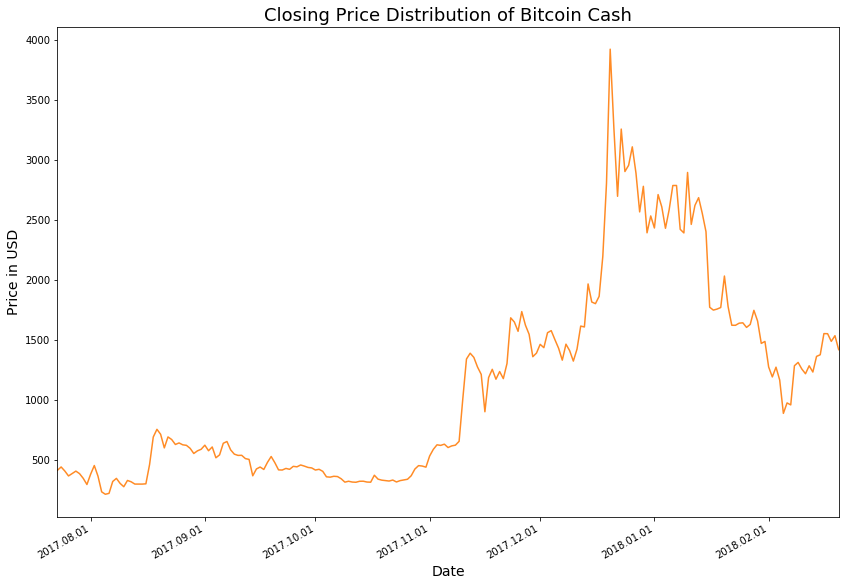

In [40]:
data_bch['Date_mpl'] = data_bch['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(14,10))
sns.tsplot(data_bch.Close.values, time=data_bch.Date_mpl.values, alpha=0.9, color=color[1], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title("Closing Price Distribution of Bitcoin Cash", fontsize=18)
plt.show()

In [41]:
coins = {'BTC':'bitcoin', 'ETH':'ethereum', 'XRP':'ripple', 'BCH':'bitcoin_cash'}
ticker = list(coins.keys())

In [42]:
df = {t: pd.read_csv("{}_price.csv".format(coins[ticker[index]].lower())) 
       for index, t in enumerate(ticker)}

In [43]:
for t in ticker:
    df[t].index = pd.to_datetime(df[t]['Date'], format='%b %d, %Y')
    df[t].drop('Date', axis=1, inplace=True)
    df[t]['Volume'] = pd.to_numeric(df[t]['Volume'].str.replace(',','').str.replace('-',''))
    df[t]['Market Cap'] = pd.to_numeric(df[t]['Market Cap'].str.replace(',','').str.replace('-',''))

In [44]:
data_c = pd.concat(df.values(), axis=1, keys=ticker)
data_c.columns.names = ['Ticker', 'Info']

In [49]:
data_c.tail().sort_index(ascending=False)

Ticker          BTC                                                          \
Info           Open     High       Low    Close        Volume    Market Cap   
Date                                                                          
2018-02-20  11231.8  11958.5  11231.80  11403.7  9.926540e+09  189536000000   
2018-02-19  10552.6  11273.8  10513.20  11225.3  7.652090e+09  178055000000   
2018-02-18  11123.4  11349.8  10326.00  10551.8  8.744010e+09  187663000000   
2018-02-17  10207.5  11139.5  10149.40  11112.7  8.660880e+09  172191000000   
2018-02-16  10135.7  10324.1   9824.82  10233.9  7.296160e+09  170960000000   

Ticker         ETH                              ...        XRP        \
Info          Open    High     Low   Close      ...        Low Close   
Date                                            ...                    
2018-02-20  943.57  965.26  892.95  895.37      ...       1.08  1.09   
2018-02-19  921.67  957.78  921.55  943.87      ...       1.12  1.14   
2018-02-18  973.35  982.93  915.45  923.92      ...       1.09  1.12   
2018-02-17  944.75  976.60  940.75  974.12      ...       1.13  1.20   
2018-02-16  934.79  950.00  917.85  944.21      ...       1.11  1.14   

Ticker                                      BCH                             \
Info              Volume    Market Cap     Open     High      Low    Close   
Date                                                                         
2018-02-20  8.066730e+08  4.464810e+10  1543.27  1569.03  1414.35  1418.73   
2018-02-19  5.563040e+08  4.381330e+10  1483.34  1553.81  1483.34  1534.77   
2018-02-18  1.113650e+09  4.699750e+10  1552.10  1641.40  1428.49  1487.46   
2018-02-17  1.186730e+09  4.437020e+10  1548.48  1568.64  1517.14  1551.39   
2018-02-16  5.683390e+08  4.466330e+10  1373.16  1558.66  1369.68  1552.20   

Ticker                                 
Info             Volume    Market Cap  
Date                                   
2018-02-20  820947000.0  2.619980e+10  
2018-02-19  578906000.0  2.517970e+10  
2018-02-18  907873000.0  2.634420e+10  
2018-02-17  641719000.0  2.628010e+10  
2018-02-16  961010000.0  2.330200e+10  

[5 rows x 24 columns]

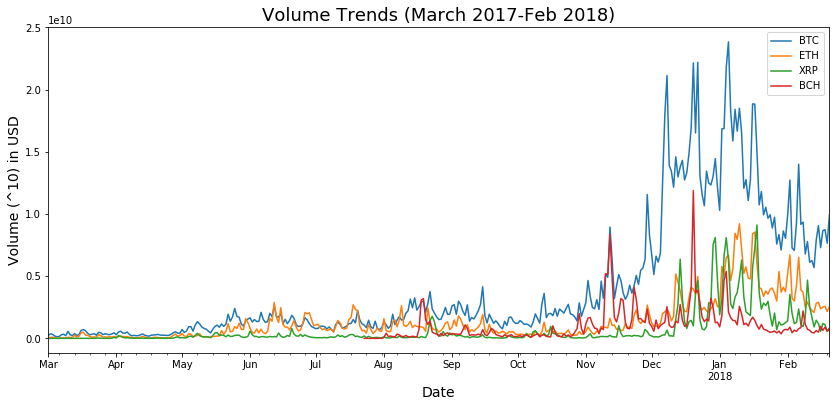

In [68]:
for t in ticker:
    data_c[t]['Volume'].loc['2017-03-01 00:00:00':'2018-02-20 00:00:00'].plot(label=t, figsize=(14,6))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume (^10) in USD', fontsize=14)
plt.title("Volume Trends (March 2017-Feb 2018)", fontsize=18)
plt.legend()


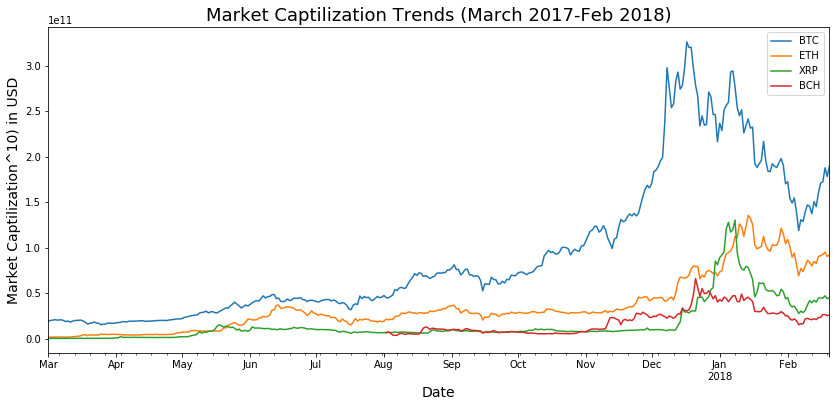

In [67]:
for t in ticker:
    data_c[t]['Market Cap'].loc['2017-03-01 00:00:00':'2018-02-20 00:00:00'].plot(label=t, figsize=(14,6))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Market Captilization^10) in USD', fontsize=14)
plt.title("Market Captilization Trends (March 2017-Feb 2018)", fontsize=18)
plt.legend()

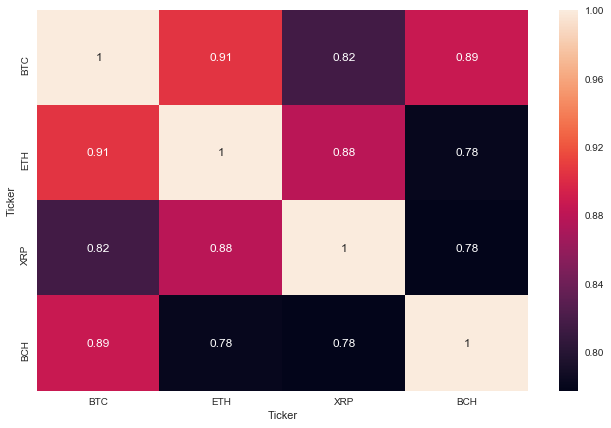

In [74]:
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(data_c.xs(key='Close', axis=1, level='Info').corr(), annot=True)